# Tensorflow testing
Jednoduchý setup prostredia a importy, ktoré budeme potrebovať

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Dataset analysis

In [23]:
zip_path = tf.keras.utils.get_file(origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
fname='jena_climate_2009_2016.csv.zip',
extract=True)
csv_path, _ = os.path.splitext(zip_path)

- ^ **stiahnutie** datasetu a **extrakcia** z googleapi
- os.path.splitext je na odstránenie .zip
- ďalej nechceme predikciu na každých 10 min, tak orežeme dataset

In [24]:
dset = pd.read_csv(csv_path)
dset.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [25]:
dset = dset[5::6]
date_time = pd.to_datetime(dset.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

dset.head().transpose()

,5,11,17,23,29
p (mbar),996.50,996.62,996.84,996.99,997.46
T (degC),-8.05,-8.88,-8.81,-9.05,-9.63
Tpot (K),265.38,264.54,264.59,264.34,263.72
Tdew (degC),-8.78,-9.77,-9.66,-10.02,-10.65
rh (%),94.40,93.20,93.50,92.60,92.20
VPmax (mbar),3.33,3.12,3.13,3.07,2.94
VPact (mbar),3.14,2.90,2.93,2.85,2.71
VPdef (mbar),0.19,0.21,0.20,0.23,0.23
sh (g/kg),1.96,1.81,1.83,1.78,1.69
H2OC (mmol/mol),3.15,2.91,2.94,2.85,2.71


In [26]:
date_time.head()

5    2009-01-01 01:00:00
11   2009-01-01 02:00:00
17   2009-01-01 03:00:00
23   2009-01-01 04:00:00
29   2009-01-01 05:00:00
Name: Date Time, dtype: datetime64[ns]

- v dset máme data a v date_time máme časové údaje
- ďalej spravím jednoduchú vizualizáciu dát

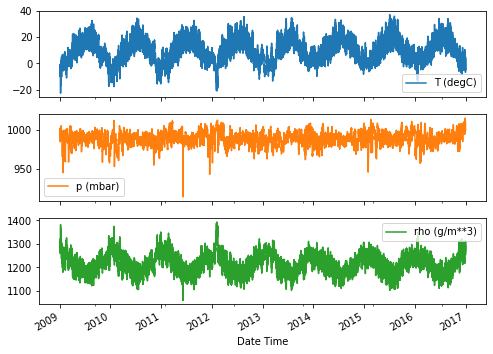

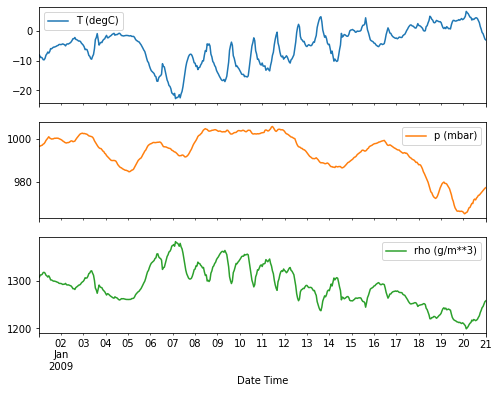

In [27]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = dset[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = dset[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

- priemerné hodnoty, kvantily, odchýlka a pod data, v stratke **štatistika**

In [28]:
dset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


- wv (wind velocity) naberá nakokot hodnoty, tak ich musíme upraviť

In [29]:
wv = dset['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = dset['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

- wind direction je v stupňoch, čo sa nám nepáči bo sa to bije s onými vecami trochu, tak to premeníme na vektor

In [30]:
wv = dset.pop('wv (m/s)')
max_wv = dset.pop('max. wv (m/s)')

wd_rad = dset.pop('wd (deg)')*np.pi / 180

dset['Wx'] = wv*np.cos(wd_rad)
dset['Wy'] = wv*np.sin(wd_rad)

dset['max Wx'] = max_wv*np.cos(wd_rad)
dset['max Wy'] = max_wv*np.sin(wd_rad)

- podobne musíme konvertovať aj date_time zo stringu
- tu to koncertujem na periódy sin a cos nech sa s tým ľahšie pracuje (google vie prečo ja nie)

In [31]:
# conversion to seconds
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

dset['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
dset['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
dset['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
dset['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [32]:
column_indices = {name: i for i, name in enumerate(dset.columns)}
n = len(dset)
train_set = dset[0:int(n*0.7)]
val_set = dset[int(n*0.7):int(n*0.9)]
test_set = dset[int(n*0.9):]

# num of columns
num_features = dset.shape[1]

In [33]:
train_mean = train_set.mean()
train_std = train_set.std()

train_set = (train_set - train_mean) / train_std
val_set = (val_set - train_mean) / train_std
test_set = (test_set - train_mean) / train_std

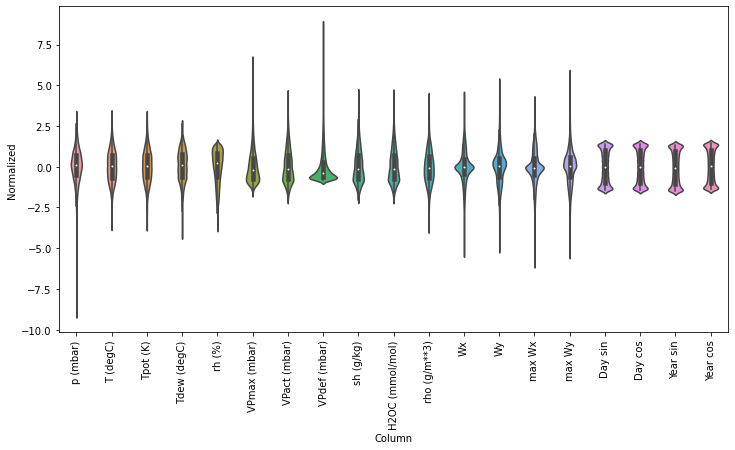

In [34]:
dset_std = (dset - train_mean) / train_std
dset_std = dset_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=dset_std)
_ = ax.set_xticklabels(dset.keys(), rotation=90)

## Data Windowing
- window size určujeme podľa tohho ako ďaľeko a podľa akých informácií chceme prediktovať
- reusable code

In [35]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_set, val_df=val_set, test_df=test_set, label_columns=None):
        self.train_set = train_set
        self.val_set = val_set
        self.test_set = test_set

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_set.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}', f'Input indices: {self.input_indices}', f'Label indices: {self.label_indices}', f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    WindowGenerator.split_window = split_window

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)
        ds = ds.map(self.split_window)
        return ds

    WindowGenerator.make_dataset = make_dataset

    @property
    def train(self):
        return self.make_dataset(self.train_set)

    @property
    def val(self):
        return self.make_dataset(self.val_set)

    @property
    def test(self):
        return self.make_dataset(self.test_set)

    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    WindowGenerator.train = train
    WindowGenerator.val = val
    WindowGenerator.test = test
    WindowGenerator.example = example

    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')

    WindowGenerator.plot = plot

- window si vytvoríme pre predikciu počasia o hodinu neskôr, pričom poznáme len súčasné podmienky

In [36]:
one_step_w = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=['T (degC)'])
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

In [37]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
        validation_data=window.val,
        callbacks=[early_stopping])
    return history

In [38]:
val_performance = {}
performance = {}
history = compile_and_fit(linear, one_step_w)
val_performance['Linear'] = linear.evaluate(one_step_w.val)
performance['Linear'] = linear.evaluate(one_step_w.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 6s 3ms/step - loss: 0.1865 - mean_absolute_error: 0.2831 - val_loss: 0.0308 - val_mean_absolute_error: 0.1348
Epoch 2/20
1534/1534 [==============================] - 4s 3ms/step - loss: 0.0236 - mean_absolute_error: 0.1105 - val_loss: 0.0114 - val_mean_absolute_error: 0.0788
Epoch 3/20
1534/1534 [==============================] - 4s 3ms/step - loss: 0.0107 - mean_absolute_error: 0.0764 - val_loss: 0.0095 - val_mean_absolute_error: 0.0720
Epoch 4/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0096 - mean_absolute_error: 0.0719 - val_loss: 0.0090 - val_mean_absolute_error: 0.0702
Epoch 5/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0093 - mean_absolute_error: 0.0704 - val_loss: 0.0088 - val_mean_absolute_error: 0.0692
Epoch 6/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0091 - mean_absolute_error: 0.0698 - val_loss: 0.0089 - val_mean_absolute_error: 0.0695
Epoc

220/220 [==============================] - 1s 2ms/step
[[[-0.42851415]]

 [[ 0.26406714]]

 [[ 0.39713818]]

 [[ 0.21145093]]

 [[ 1.4239893 ]]]


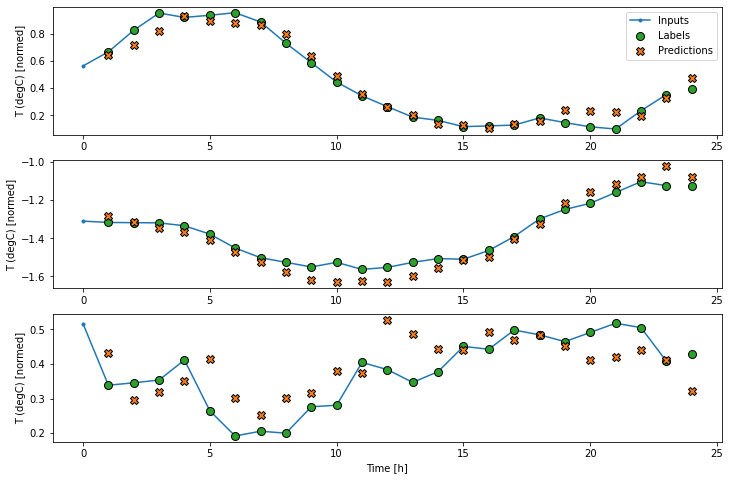

In [39]:
result = linear.predict(one_step_w.test)
print(result[:5])
wide_window.plot(linear)

In [40]:
multiWin = WindowGenerator(input_width=48, label_width=24, shift=24)

In [41]:
multi_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(24*num_features, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([24, num_features])
])

In [42]:
history = compile_and_fit(multi_lstm, multiWin)
loss, acc = multi_lstm.evaluate(multiWin.test)
print(loss, acc)
multiWin.plot(multi_lstm)

Epoch 1/20
1531/1531 [==============================] - 36s 20ms/step - loss: 0.2928 - mean_absolute_error: 0.3632 - val_loss: 0.2302 - val_mean_absolute_error: 0.3066
Epoch 2/20
1531/1531 [==============================] - 29s 19ms/step - loss: 0.2171 - mean_absolute_error: 0.2941 - val_loss: 0.2199 - val_mean_absolute_error: 0.2943
Epoch 3/20
1531/1531 [==============================] - 31s 20ms/step - loss: 0.2086 - mean_absolute_error: 0.2851 - val_loss: 0.2171 - val_mean_absolute_error: 0.2906
Epoch 4/20
 984/1531 [==================>...........] - ETA: 10s - loss: 0.2037 - mean_absolute_error: 0.2804

KeyboardInterrupt: 

Epoch 1/20
1531/1531 [==============================] - 19s 11ms/step - loss: 0.3464 - mean_absolute_error: 0.4103 - val_loss: 0.2538 - val_mean_absolute_error: 0.3335
Epoch 2/20
1531/1531 [==============================] - 15s 10ms/step - loss: 0.2385 - mean_absolute_error: 0.3190 - val_loss: 0.2347 - val_mean_absolute_error: 0.3099
Epoch 3/20
1531/1531 [==============================] - 15s 10ms/step - loss: 0.2265 - mean_absolute_error: 0.3033 - val_loss: 0.2290 - val_mean_absolute_error: 0.3019
Epoch 4/20
1531/1531 [==============================] - 15s 10ms/step - loss: 0.2216 - mean_absolute_error: 0.2967 - val_loss: 0.2262 - val_mean_absolute_error: 0.2976
Epoch 5/20
1531/1531 [==============================] - 15s 10ms/step - loss: 0.2184 - mean_absolute_error: 0.2929 - val_loss: 0.2237 - val_mean_absolute_error: 0.2948
Epoch 6/20
1531/1531 [==============================] - 15s 10ms/step - loss: 0.2162 - mean_absolute_error: 0.2904 - val_loss: 0.2222 - val_mean_absolute_error:

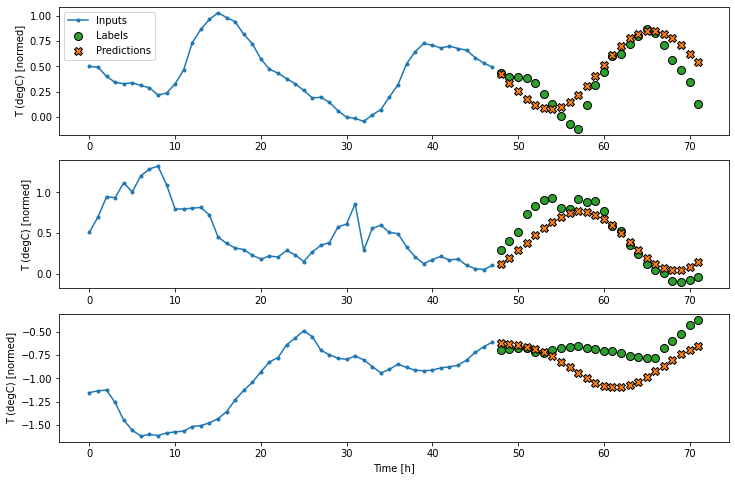

In [ ]:
multi_lstm_v2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(24*num_features, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([24, num_features])
])
history = compile_and_fit(multi_lstm_v2, multiWin)
loss, acc = multi_lstm_v2.evaluate(multiWin.test)
print(loss, acc)
multiWin.plot(multi_lstm_v2)

In [ ]:
test_set.__array__()



array([[ 1.00193000e+03,  2.80000000e+00,  2.75810000e+02, ...,
         5.00000000e-01,  9.37669875e-01,  3.47527274e-01],
       [ 1.00238000e+03,  2.75000000e+00,  2.75720000e+02, ...,
         7.07106781e-01,  9.37918735e-01,  3.46855080e-01],
       [ 1.00263000e+03,  2.46000000e+00,  2.75410000e+02, ...,
         8.66025404e-01,  9.38167114e-01,  3.46182707e-01],
       ...,
       [ 1.00119000e+03, -2.75000000e+00,  2.70320000e+02, ...,
         7.37277337e-01,  8.33369332e-03,  9.99965274e-01],
       [ 1.00065000e+03, -2.89000000e+00,  2.70220000e+02, ...,
         8.87010833e-01,  9.05044860e-03,  9.99959044e-01],
       [ 1.00011000e+03, -3.93000000e+00,  2.69230000e+02, ...,
         9.76296007e-01,  9.76719924e-03,  9.99952300e-01]])

In [ ]:
np.array(test_set)

array([[ 1.00193000e+03,  2.80000000e+00,  2.75810000e+02, ...,
         5.00000000e-01,  9.37669875e-01,  3.47527274e-01],
       [ 1.00238000e+03,  2.75000000e+00,  2.75720000e+02, ...,
         7.07106781e-01,  9.37918735e-01,  3.46855080e-01],
       [ 1.00263000e+03,  2.46000000e+00,  2.75410000e+02, ...,
         8.66025404e-01,  9.38167114e-01,  3.46182707e-01],
       ...,
       [ 1.00119000e+03, -2.75000000e+00,  2.70320000e+02, ...,
         7.37277337e-01,  8.33369332e-03,  9.99965274e-01],
       [ 1.00065000e+03, -2.89000000e+00,  2.70220000e+02, ...,
         8.87010833e-01,  9.05044860e-03,  9.99959044e-01],
       [ 1.00011000e+03, -3.93000000e+00,  2.69230000e+02, ...,
         9.76296007e-01,  9.76719924e-03,  9.99952300e-01]])

In [55]:
lstm_v3 = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(72, activation='relu', input_shape=(48, 19), return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Reshape([24, num_features])
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, mode='min')

lstm_v3.compile(loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.MeanAbsoluteError()])
training = lstm_v3.fit(multiWin.train, epochs=20, callbacks=[early_stopping])

Epoch 1/20
1531/1531 [==============================] - 86s 53ms/step - loss: 0.4057 - mean_absolute_error: 0.4658
Epoch 2/20
1531/1531 [==============================] - 84s 55ms/step - loss: 0.3163 - mean_absolute_error: 0.4046
Epoch 3/20
1531/1531 [==============================] - 111s 72ms/step - loss: 0.3005 - mean_absolute_error: 0.3918
Epoch 4/20
1531/1531 [==============================] - 104s 68ms/step - loss: 0.2918 - mean_absolute_error: 0.3852
Epoch 5/20
1531/1531 [==============================] - 105s 68ms/step - loss: 0.2848 - mean_absolute_error: 0.3799
Epoch 6/20
1531/1531 [==============================] - 108s 70ms/step - loss: 0.2787 - mean_absolute_error: 0.3758
Epoch 7/20
1531/1531 [==============================] - 99s 65ms/step - loss: 0.2734 - mean_absolute_error: 0.3721
Epoch 8/20
1531/1531 [==============================] - 91s 60ms/step - loss: 0.2686 - mean_absolute_error: 0.3687
Epoch 9/20
1531/1531 [==============================] - 92s 60ms/step - loss

217/217 [==============================] - 3s 14ms/step - loss: 0.2512 - mean_absolute_error: 0.3301
0.2511579096317291 0.33006376028060913


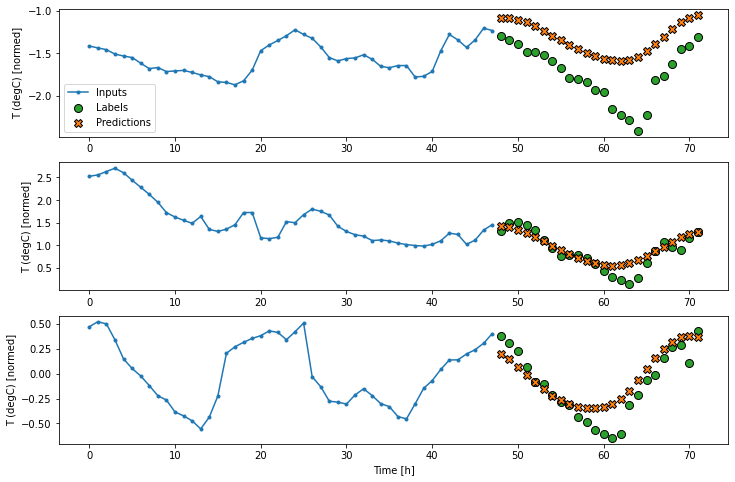

In [57]:
loss, acc = lstm_v3.evaluate(multiWin.test)
print(loss, acc)
multiWin.plot(lstm_v3)